In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.preprocessing.image import ImageDataGenerator
import os

num_classes = 20
img_rows, img_cols = 32, 32
batch_size = 16

train_data_dir = r'C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\simpsons\train'
validation_data_dir = r'C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\simpsons\validation'

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Using TensorFlow backend.


Found 19548 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


In [5]:
model = Sequential([
    
    Conv2D(64, (3, 3), padding = 'same', activation = 'relu', input_shape = (img_rows, img_cols, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(256, (3, 3), padding = 'same', activation = 'relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), padding = 'same', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(num_classes, activation = 'softmax')

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_26 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 128)      

In [14]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("Checkpoints/simpsons_little_vgg.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 4,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.3,
                              patience = 2,
                              verbose = 1,
                              min_delta = 0.00001)

callbacks = [earlystop, checkpoint, reduce_lr]

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.01),
              metrics = ['accuracy'])

nb_train_samples = 19548
nb_validation_samples = 990
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
1221/1221 [==============================] - 864s 708ms/step - loss: 2.7424 - accuracy: 0.1906 - val_loss: 1.6965 - val_accuracy: 0.3422

Epoch 00001: val_loss improved from inf to 1.69651, saving model to Checkpoints/simpsons_little_vgg.h5
Epoch 2/10
1221/1221 [==============================] - 701s 574ms/step - loss: 2.0710 - accuracy: 0.3680 - val_loss: 3.4639 - val_accuracy: 0.2926

Epoch 00002: val_loss did not improve from 1.69651
Epoch 3/10
1221/1221 [==============================] - 764s 626ms/step - loss: 1.7473 - accuracy: 0.4755 - val_loss: 2.2579 - val_accuracy: 0.3891

Epoch 00003: val_loss did not improve from 1.69651

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0029999999329447745.
Epoch 4/10
1221/1221 [==============================] - 762s 624ms/step - loss: 1.3091 - accuracy: 0.6113 - val_loss: 0.7818 - val_accuracy: 0.6735

Epoch 00004: val_loss improved from 1.69651 to 0.78177, saving model to Checkpoints/simpsons_little_vgg.h5
Epoch 5/10


In [15]:
test_loss, test_accuracy = model.evaluate(validation_generator)

62/62 [==============================] - 21s 340ms/step


In [16]:
print('Test Loss: {0:.2f} Test Accuracy: {1:.2f}%'.format(test_loss, test_accuracy * 100))

Test Loss: 0.40 Test Accuracy: 90.30%


Found 990 images belonging to 20 classes.
Confusion Matrix
[[40  0  1  0  0  0  0  6  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 42  1  0  0  0  2  0  0  0  1  1  2  0  0  0  0  0  0]
 [ 0  1  1 39  0  1  0  1  0  0  0  1  0  0  0  1  0  0  0  3]
 [ 0  0  0  0 48  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  1 39  1  0  0  0  0  0  0  0  0  6  1  0  0  1]
 [ 0  0  0  0  0  0 42  0  1  0  0  0  1  0  0  1  3  2  0  0]
 [ 0  0  1  0  0  0  0 47  0  1  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 48  1  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  4  0  0 41  0  0  0  0  0  3  0  0  0]
 [ 0  0  1  1  1  0  0  1  0  0  0 45  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 49  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  1  0  0  0  0 42  0  2  0  1  0  3]
 [ 0  0  0  0  0  1  0  0  0  0  0  1  0  0 46  1  0  0  0 

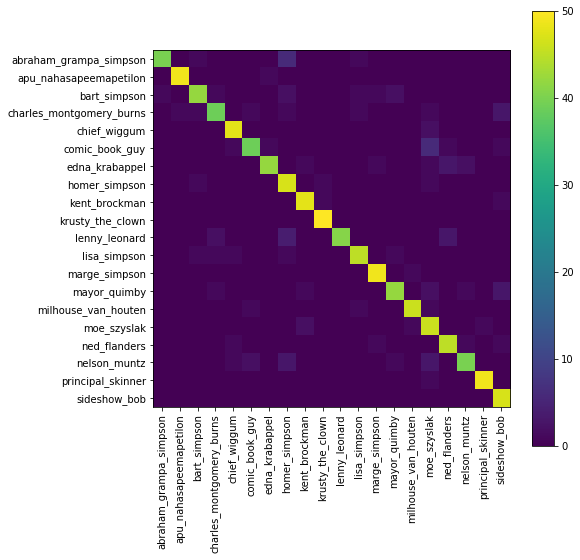

In [17]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 19548
nb_validation_samples = 990

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [18]:
from keras.models import load_model

classifier = load_model('Checkpoints/simpsons_little_vgg.h5')

In [20]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 300 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)
    

def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of images
img_width, img_height = 32, 32

files = []
predictions = []
true_labels = []

# predicting images
for i in range(0, 10):
    path = (r'C:\Users\ASK Computers\Desktop\CV Projects\DeepLearningCV\simpsons\validation\\')
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = classifier.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    image = cv2.resize(image, None, fx=5, fy=5, interpolation = cv2.INTER_CUBIC)
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()